In [3]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

In [4]:
# Find f(x)/g(x) maximum value = c, then find RN, between (0,1), if RN<=f(x)/C.(g(x)), then accept else, reject 
def rand_ac_rej(N):

#     # Accept/Reject Method 
    i = 0
    U1, U2 = np.random.normal(0,1,N),np.random.normal(0,1,N)
    X_accept_reject = []
    while i < N:     
        X = U1[i]
        Y = U2[i]     
        if Y <=  0.5*(4 - X**2)/2*np.exp(- X**2):            #Give the conditions here for accept reject.
            X_accept_reject.append(X)
        i+=1
    X_accept_reject = np.array(X_accept_reject)
    plt.hist(X_accept_reject, bins=30, density=True, alpha=0.5, label='ACR ')

    # Theoretical distribution
    x = np.linspace(-2, 2, 1000)
    y = 0.5 * (4 - x**2)
    plt.plot(x, y, 'r', label='Theoretical ( 0.5 * (4 - x**2))')

    plt.legend()
    plt.show()
    
    return X_accept_reject

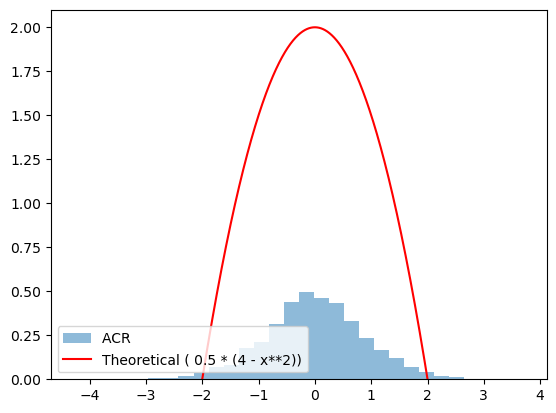

The PRNG sequeence is:
 [-1.22694015  0.68434859 -0.58460345 ...  0.52872878 -0.15615862
 -0.4826585 ]
The probability of acceptance: 69.66 %


In [5]:
# Output
# Number of random numbers to generate (Input)
N_rand = 10000
X_ar = rand_ac_rej(N_rand)

print(f"The PRNG sequeence is:\n {X_ar}")
print("The probability of acceptance:",(len(X_ar)*100/N_rand),"%")

In [8]:
# This does find the variational method for SHO

# Define the trial wavefunction
def psi_trial(x, alpha):
        return (alpha**(2) - x**(2))/2

# Define the local energy
def E_local(x, alpha, omega):
    return  -2/((alpha**(2) - x**(2) )) + x**(2)/2

def SHO_variational(N,omega):

    alpha_values = np.linspace(0.1, 2, 30)  # Range of alpha values

    # Initialize arrays to store position and energy
    x = np.zeros(N)
    E = np.zeros(N)

    # Initial position
    x[0] = 0


    # Initialize arrays to store average energy and variance for each alpha
    E_avg_values = []
    E_var_values = []

    # Loop over alpha values
    for alpha in alpha_values:
        # Metropolis algorithm
        for i in range(N-1):
            x_trial = x[i] + np.random.normal(0,2)
            R = np.abs(psi_trial(x_trial, alpha)/psi_trial(x[i], alpha))**2
            if R > np.random.normal(0,2):
                x[i+1] = x_trial
            else:
                x[i+1] = x[i]
            E[i+1] = E_local(x[i+1], alpha, omega)

    # Compute average energy and variance
        E_avg = np.mean(E)
        E_var = np.var(E)
        E_avg_values.append(E_avg)
        E_var_values.append(E_var)

    # Plot average energy and variance as a function of alpha
    # plt.figure(figsize=(12, 6))
    alpha_min_var = alpha_values[np.argmin(E_var_values)]
    plt.plot(alpha_values, E_avg_values,label = "Average energies")
    
    plt.xlabel('Alpha')
    plt.ylabel('Average Energy')
    plt.show()
    plt.axvline(x=alpha_min_var, color='r', linestyle='--')  # Draw vertical line at minimum variance
    plt.plot(alpha_values, E_var_values,label = "Variance")
    plt.xlabel('Alpha')
    plt.ylabel('Energy / Variance')
    plt.legend()
    # plt.tight_layout()
    plt.show()
    print("The optimal value of alpha is:",alpha_min_var)
    
    print("The average lowest energy of the ground state is" ,E_var_values[np.argmin(E_var_values)])
    
    print(f"The psi is: 0.5({alpha_min_var} - x^(2))") 

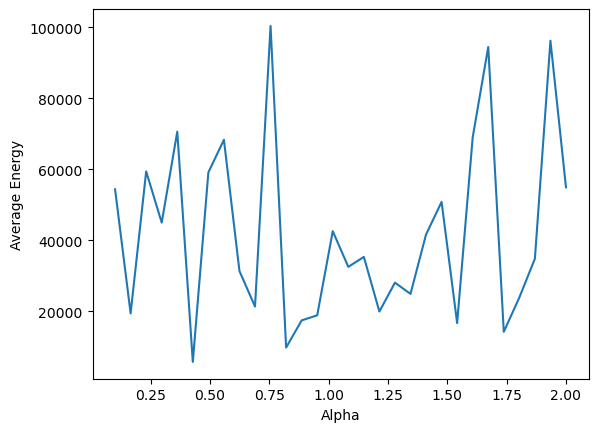

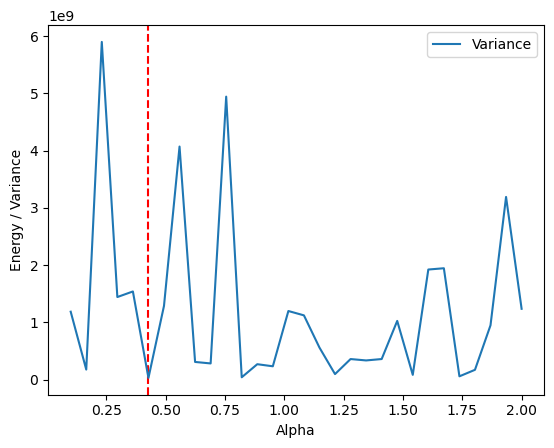

The optimal value of alpha is: 0.4275862068965517
The average lowest energy of the ground state is 29695814.387259424
The psi is: 0.5(0.4275862068965517 - x^(2))


In [9]:
# Define constants
N = 20000  # Number of Monte Carlo steps
omega = 1  # Frequency of oscillator
SHO_variational(N,omega)